In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
img = cv2.imread('shapes.jpg')
drawing = np.zeros(img.shape[:], dtype=np.uint8)

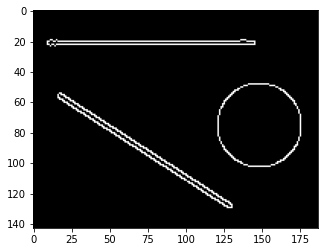

In [10]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img_gray, 50, 150)
plt.imshow(edges, 'gray')
plt.show()

In [11]:
# 霍夫直线变换
# 参数1：要检测的二值图（一般是阈值分割或边缘检测后的图）
# 参数2：距离r的精度，值越大，考虑越多的线
# 参数3：角度θ的精度，值越小，考虑越多的线
# 参数4：累加数阈值，值越小，考虑越多的线
# 函数返回的是一组直线的(r,θ)数据
lines = cv2.HoughLines(edges, 0.8, np.pi / 180, 90)

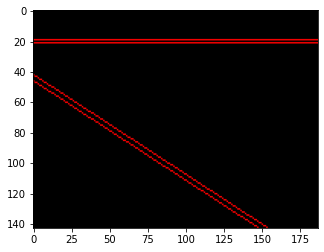

In [12]:
for line in lines:
    rho, theta = line[0]
    a, b = np.cos(theta), np.sin(theta)
    x0, y0 = a * rho, b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(drawing, (x1, y1), (x2, y2), (0, 0, 255))

plt.imshow(drawing[:,:,::-1])
plt.show()

In [13]:
# 统计概率霍夫直线变换
drawing = np.zeros(img.shape[:], dtype=np.uint8)
# 3.统计概率霍夫线变换
# minLineLength：最短长度阈值，比这个长度短的线会被排除
# maxLineGap：同一直线两点之间的最大距离
lines = cv2.HoughLinesP(edges, 0.8, np.pi / 180, 90,
                        minLineLength=50, maxLineGap=10)

In [14]:
# 3.将检测的线画出来
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(drawing, (x1, y1), (x2, y2), (0, 255, 0), 1, lineType=cv2.LINE_AA)

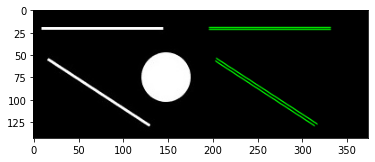

In [15]:
plt.imshow(np.hstack((img,drawing))[:,:,::-1])
plt.show()

In [18]:
# 霍夫圆变换
drawing = np.zeros(img.shape[:], dtype=np.uint8)
# 2.霍夫圆变换
# 参数2：变换方法，一般使用霍夫梯度法
# 参数3 dp=1：表示霍夫梯度法中累加器图像的分辨率与原图一致
# 参数4：两个不同圆圆心的最短距离
# 参数5：param2跟霍夫直线变换中的累加数阈值一样
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, 20, param2=30)
print(circles.shape)
circles = np.int0(np.around(circles))

(1, 1, 3)


In [21]:
# 将检测的圆画出来
for i in circles[0, :]:
    cv2.circle(drawing, (i[0], i[1]), i[2], (0, 255, 0), 2)  # 画出外圆
    cv2.circle(drawing, (i[0], i[1]), 2, (0, 0, 255), 3)  # 画出圆心

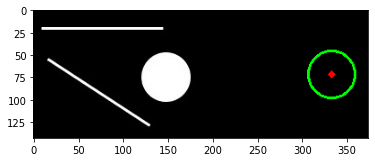

In [22]:
plt.imshow(np.hstack((img,drawing))[:,:,::-1])
plt.show()